In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create path
path = r'C:\Users\jacob\Documents\Data Analytics\Data Immersion\Achievement 4\10-2023 Instacart Basket Analysis'

In [3]:
#import data orders_products_customers_active_merged.pkl
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_active_merged.pkl'))

In [12]:
#create a dataframe that groups data by loyalty flag, then order id and then finds the sum of all product prices for that order
loyal_habits = df.groupby(['loyalty_flag', 'order_id']).agg({'prices' : ['sum']})

C:\Users\jacob\AppData\Local\Temp\ipykernel_3264\117323579.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loyal_habits = df.groupby(['loyalty_flag', 'order_id']).agg({'prices' : ['sum']})


In [13]:
#check output
loyal_habits

prices
                                  sum
loyalty_flag     order_id            
Loyal Customer   2           0.000000
                 3           0.000000
                 4          92.811523
                 5         210.683594
                 6           0.000000
...                               ...
Regular Customer 3421079     1.599609
                 3421080     0.000000
                 3421081     0.000000
                 3421082    56.389648
                 3421083    69.394531

[9193110 rows x 1 columns]

C:\Users\jacob\AppData\Local\Temp\ipykernel_3264\963404958.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loyal_habits_bar = loyal_habits.groupby('loyalty_flag')['prices'].mean().plot.bar(color = 'green', legend = False)


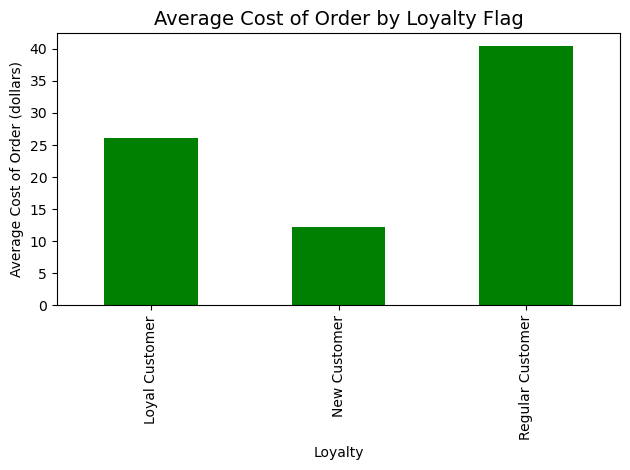

In [24]:
#find the mean of order totals and group by loyalty flag and turn into a bar chart
loyal_habits_bar = loyal_habits.groupby('loyalty_flag')['prices'].mean().plot.bar(color = 'green', legend = False)
plt.xlabel ('Loyalty', fontsize = 10)
plt.ylabel ('Average Cost of Order (dollars)', fontsize = 10)
plt.title ('Average Cost of Order by Loyalty Flag', fontsize = 14)
plt.tight_layout()

### Create a deptartment name dataframe

In [59]:
#dept dictionary
departments = {'1': 'frozen',
               '2': 'other',
               '3': 'bakery',
               '4': 'produce',
               '5': 'alcohol',
               '6':'international',
               '7': 'beverages',
               '8': 'pets',
               '9': 'dry goods pasta',
               '10': 'bulk',
               '11': 'personal care',
               '12': 'meat seafood',
               '13': 'pantry',
               '14': 'breakfast',
               '15': 'canned goods',
               '16': 'dairy eggs',
               '17': 'household',
               '18': 'babies',
               '19': 'snacks',
               '20': 'deli',
               '21': 'missing'}

In [60]:
df['department_id'] = df['department_id'].astype('str')

In [61]:
#create a new dataframe which only contains order id and department id columns
df_depts = df[['order_id','department_id']]

In [62]:
#createa replace department_id numeric values with department list values
df_depts.replace({'department_id' : departments}, inplace = True)

C:\Users\jacob\AppData\Local\Temp\ipykernel_3264\881272921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depts.replace({'department_id' : departments}, inplace = True)


In [63]:
#check output
df_depts['department_id'].value_counts()

department_id
produce            9079273
dairy eggs         5176528
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

### Differences by Region

In [54]:
#create a dataframe that represents top 20 deparatments across all regions by number of products purchased from that deparment
top_20_dept_region = df.groupby('region')['department_id'].value_counts().nlargest (20)

In [55]:
#check output
top_20_dept_region

region     department_id
South      4                3027476
West       4                2324678
Midwest    4                2134115
South      16               1722789
Northeast  4                1593004
West       16               1326940
Midwest    16               1212284
South      19                916780
Northeast  16                914515
South      7                 859419
West       19                711329
South      1                 709906
West       7                 650574
Midwest    19                645143
           7                 598979
South      13                591754
West       1                 543164
Midwest    1                 498225
Northeast  19                493154
           7                 462929
Name: count, dtype: int64

Text(0.5, -0.05, 'Dept ID key: 1 = Frozen, 4 = Produce, 7 = Beverages, 13 = Pantry, 16 = Dairy/Eggs, 19 = Snacks')

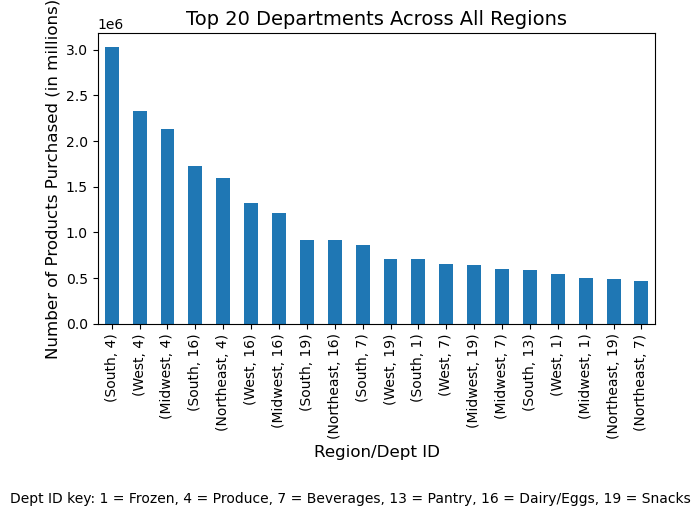

In [72]:
#create a bar chart of top 20 depts across all regions
top_20_dept_region_bar = top_20_dept_region.plot.bar()
plt.xlabel ('Region/Dept ID', fontsize = 12)
plt.ylabel ('Number of Products Purchased (in millions)', fontsize = 12)
plt.title ('Top 20 Departments Across All Regions', fontsize = 14)
plt.tight_layout()
plt.figtext (0.5, -0.05,'Dept ID key: 1 = Frozen, 4 = Produce, 7 = Beverages, 13 = Pantry, 16 = Dairy/Eggs, 19 = Snacks', ha='center', va='center', fontsize=10)

In [32]:
#create a data frame that represents the top 5 dept by region
top_5_dept_region = region_habits.groupby('region').nlargest(5)

In [46]:
#create chart of top 5 dept by region
top_5_dept_region

region     region     department_id
Midwest    Midwest    4                2134115
                      16               1212284
                      19                645143
                      7                 598979
                      1                 498225
Northeast  Northeast  4                1593004
                      16                914515
                      19                493154
                      7                 462929
                      1                 370436
South      South      4                3027476
                      16               1722789
                      19                916780
                      7                 859419
                      1                 709906
West       West       4                2324678
                      16               1326940
                      19                711329
                      7                 650574
                      1                 543164
Name: count, dtype: int6

In [36]:
#create a dataframe that compares region spending
region_spending = df.groupby(['region','order_id']).agg({'prices' : ['sum']})

In [37]:
#check output
region_spending

prices
                         sum
region  order_id            
Midwest 6          27.496094
        14         75.093750
        18        193.882812
        28        141.392578
        30         29.599609
...                      ...
West    3421077    39.296875
        3421078    73.902344
        3421079     1.599609
        3421082    56.389648
        3421083    69.394531

[3064370 rows x 1 columns]

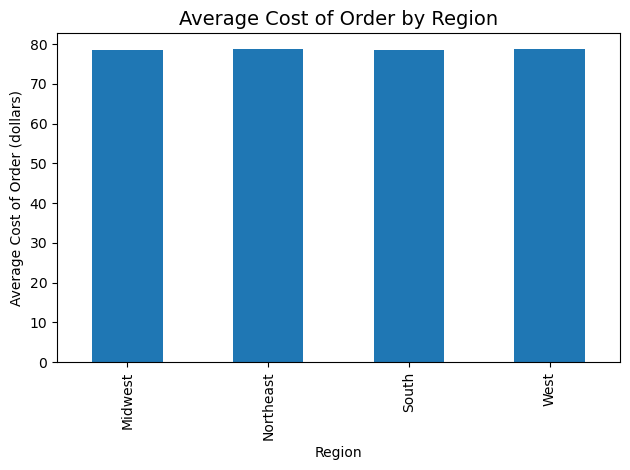

In [45]:
#create a bar showing avg cost per order by region
region_spending_bar = region_spending.groupby('region')['prices'].mean().plot.bar(legend = False)
plt.xlabel ('Region', fontsize = 10)
plt.ylabel ('Average Cost of Order (dollars)', fontsize = 10)
plt.title ('Average Cost of Order by Region', fontsize = 14)
plt.tight_layout()

In [47]:
#create a dataframe the represents the number of customers by region
region_cust = df.groupby('region')['user_id'].nunique()

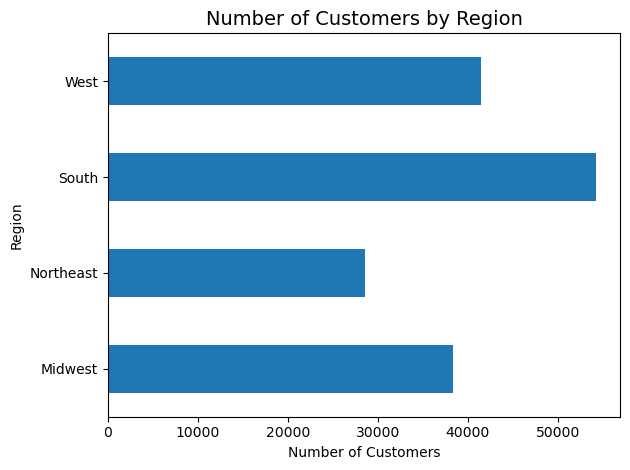

In [74]:
#create a bar chart representing number of customers by region
region_cust_bar = region_cust.plot.barh()
plt.xlabel ('Number of Customers', fontsize = 10)
plt.ylabel ('Region', fontsize = 10)
plt.title ('Number of Customers by Region', fontsize = 14)
plt.tight_layout()

### Spending Habits between age and family status

In [80]:
#create a new data frame with the following columns
df_2 = df[['order_id', 'user_id', 'age','product_id','prices','marital_status']]

In [81]:
#check output
df_2

,order_id,user_id,age,product_id,prices,marital_status
0,2539329,1,31,196,9.000000,married
1,2398795,1,31,196,9.000000,married
2,473747,1,31,196,9.000000,married
3,2254736,1,31,196,9.000000,married
4,431534,1,31,196,9.000000,married
...,...,...,...,...,...,...
32404152,3308056,106143,25,19675,10.703125,single
32404153,2988973,106143,25,19675,10.703125,single
32404154,930,106143,25,19675,10.703125,single
32404155,467253,106143,25,19675,10.703125,single


In [94]:
df_2['order_cost'] = df_2.groupby('order_id')['prices'].transform('sum')

C:\Users\jacob\AppData\Local\Temp\ipykernel_3264\1677045379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['order_cost'] = df_2.groupby('order_id')['prices'].transform('sum')


In [95]:
df_2

,order_id,user_id,age,product_id,prices,marital_status,order_cost
0,2539329,1,31,196,9.000000,married,31.597656
1,2398795,1,31,196,9.000000,married,35.394531
2,473747,1,31,196,9.000000,married,28.199219
3,2254736,1,31,196,9.000000,married,26.000000
4,431534,1,31,196,9.000000,married,56.996094
...,...,...,...,...,...,...,...
32404152,3308056,106143,25,19675,10.703125,single,10.703125
32404153,2988973,106143,25,19675,10.703125,single,10.703125
32404154,930,106143,25,19675,10.703125,single,10.703125
32404155,467253,106143,25,19675,10.703125,single,10.703125


In [98]:
df_2.groupby('user_id')['order_cost'].mean()

user_id
1          40.552620
2         123.596802
3          64.984886
4          39.433594
7          99.602135
             ...    
206203    173.170303
206206     47.336338
206207    121.186790
206208    132.896393
206209     86.879433
Name: order_cost, Length: 162631, dtype: float32